In [28]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [46]:
%pwd

'/content/drive/.shortcut-targets-by-id/1XGncDXKQo9dAqcT6yuHXmatF1r_F87Mq/Projeto ESALQ/ESALQ_maira/bezerro_julho/manha'

In [47]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
#!ls "/content/drive/My Drive/Colab Notebooks/ESALQ"

%cd /content/drive/My Drive/Projeto ESALQ/ESALQ_maira/bezerro_julho/manha
%ls



/content/drive/.shortcut-targets-by-id/1XGncDXKQo9dAqcT6yuHXmatF1r_F87Mq/Projeto ESALQ/ESALQ_maira/bezerro_julho/manha
01_pm_manha_140722.wav         58_dm_manha_060722.wav
46_pm_manha2_120722.wav        58_pm_manha_060722_2.wav
48_pm_manha_110722.wav         58_pm_manha_060722.wav
48_pm_manha2_110722.wav        59_dm_manha_010722.wav
49_pm_manha_110722.wav         59_dm_manha_080722.wav
49_pm_manha_140722.wav         59_pm_manha_010722_2.wav
56_dm_manha_040722.wav         59_pm_manha_010722.wav
56_dm_manha_110722.wav         59_pm_manha_080722_2.wav
56_pm_manha_040722.wav         59_pm_manha_080722.wav
56_pm_manha_110722.wav         60_pm_manha_1107.wav
56_pm_manha_280622_varios.wav  61_dm_manha_0507.wav
57_pm_manha_060722.wav         61_pm_manha_0507.wav
57_pm_manha_1307_duvida.wav    61_pm_manha_1207.wav
57_pm_manha_290622.wav         feature_extraction
57_pm_manha_300622_varios.wav  read_pm.ipynb


<ipython-input-48-aa094cc77a97>:11: WavFileWarning: Chunk (non-data) not understood, skipping it.
  input_data = read(str(57) + "_pm_manha_290622.wav")


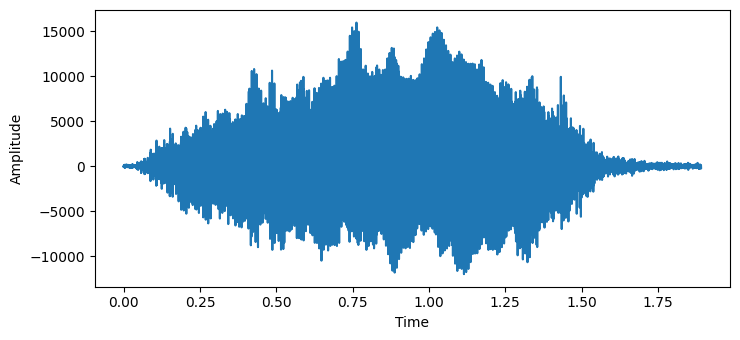

In [48]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import numpy as np

#sampling frequency wav 44.1 kHz
fs = 44100 

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

input_data = read(str(57) + "_pm_manha_290622.wav")
audio = input_data[1]
# salvar os dois arquivos audios
audio1 = audio[:,0]
audio2 = audio[:,1]

len_audio = len(audio1)
#print('len_audio = ', len_audio)

# definir vetor tempo
tempo = np.linspace(0,len_audio/fs,len_audio)
len_tempo = len(tempo)
#print('tempo = ', len_tempo)
plt.plot(tempo,audio1)
#plt.plot(tempo,audio2)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.show()


Duration =  1.8915192743764173
N =  83416


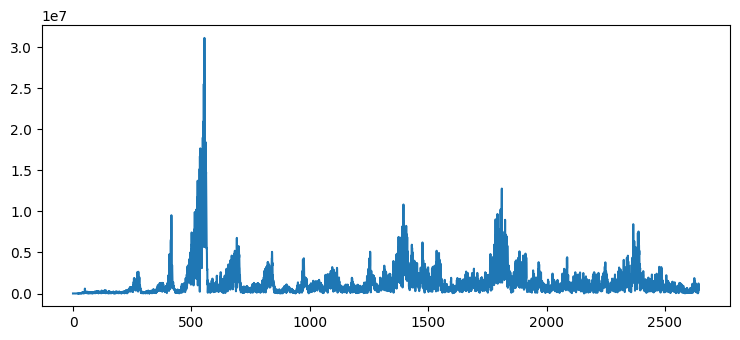

Maximum Freq:  555.1093315431092


In [49]:
# FFT
from scipy.fft import rfft, rfftfreq

SAMPLE_RATE = 1/fs
DURATION = tempo[len_audio-1]
print('Duration = ', DURATION)

# Number of samples in normalized_tone
N = int(DURATION / SAMPLE_RATE)
print('N = ', N)

yf = rfft(audio1)
xf = rfftfreq(N, SAMPLE_RATE)

plt.plot(xf[0:5000], np.abs(yf)[0:5000])
plt.show()

max_pos = np.array(np.abs(yf)).argmax()
print("Maximum Freq: ", xf[max_pos])

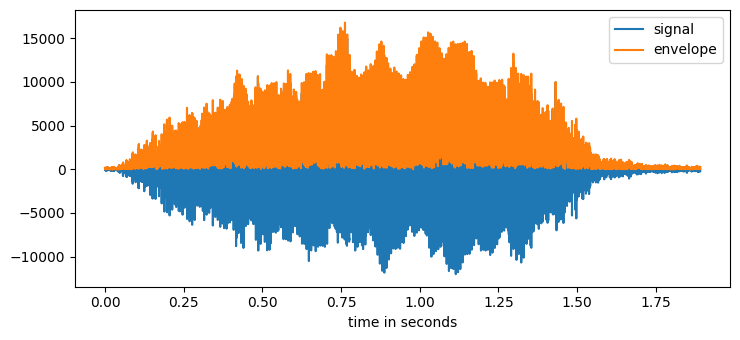

In [50]:
# Hibert
from scipy.signal import hilbert, chirp
#signal = chirp(tempo, 20.0, tempo[-1], 100.0)
#signal *= (1.0 + 0.5 * np.sin(2.0*np.pi*3.0*tempo) )
#print(audio1)
N_fourier = int(len_audio)
analytic_signal = hilbert(audio1, N = N_fourier)
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = (np.diff(instantaneous_phase) /
                           (2.0*np.pi) * fs)

t = np.linspace(0, DURATION, N_fourier)
fig, (ax0) = plt.subplots(nrows=1)
ax0.plot(tempo, audio1, label='signal')
ax0.plot(t, amplitude_envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()
#ax1.plot(t, instantaneous_frequency)
#ax1.set_xlabel("time in seconds")
#ax1.set_ylim(0.0, 50000)
fig.tight_layout()

In [42]:
import numpy as np
from matplotlib import pyplot as plt

def hl_envelopes_idx(s, dmin=1, dmax=1, split=False):
    """
    Input :
    s: 1d-array, data signal from which to extract high and low envelopes
    dmin, dmax: int, optional, size of chunks, use this if the size of the input signal is too big
    split: bool, optional, if True, split the signal in half along its mean, might help to generate the envelope in some cases
    Output :
    lmin,lmax : high/low envelope idx of input signal s
    """

    # locals min      
    lmin = (np.diff(np.sign(np.diff(s))) > 0).nonzero()[0] + 1 
    # locals max
    lmax = (np.diff(np.sign(np.diff(s))) < 0).nonzero()[0] + 1 
    
    if split:
        # s_mid is zero if s centered around x-axis or more generally mean of signal
        s_mid = np.mean(s) 
        # pre-sorting of locals min based on relative position with respect to s_mid 
        lmin = lmin[s[lmin]<s_mid]
        # pre-sorting of local max based on relative position with respect to s_mid 
        lmax = lmax[s[lmax]>s_mid]

    # global min of dmin-chunks of locals min 
    lmin = lmin[[i+np.argmin(s[lmin[i:i+dmin]]) for i in range(0,len(lmin),dmin)]]
    # global max of dmax-chunks of locals max 
    lmax = lmax[[i+np.argmax(s[lmax[i:i+dmax]]) for i in range(0,len(lmax),dmax)]]
    
    return lmin,lmax

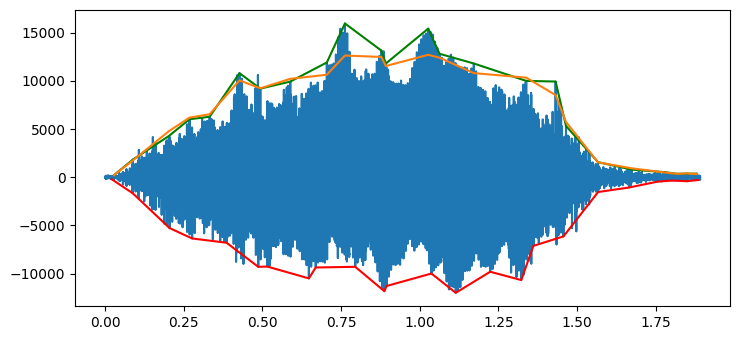

In [51]:
lmin, lmax = hl_envelopes_idx(audio1,274,274)
LW = audio1[lmin]
UP = audio1[lmax]
ENVELOPE = (UP-LW)/2
# plot
plt.plot(tempo,audio1,label='signal')
plt.plot(tempo[lmin], LW, 'r', label='low')
plt.plot(tempo[lmax], UP, 'g', label='high')
plt.plot(tempo[lmax],(UP-LW)/2)


[8 1 3 3 9]
[  211.   2712.2  5213.4  7714.6 10215.8 12717. ]
[8. 1. 3. 3. 9.]


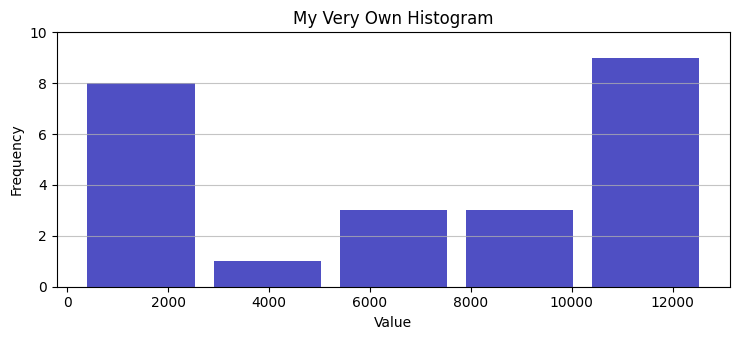

In [55]:
hist, bin_edges = np.histogram(ENVELOPE, bins=5)
print(hist)
print(bin_edges)
n, bins, patches = plt.hist(x=ENVELOPE, bins=5, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('My Very Own Histogram')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

print(n)

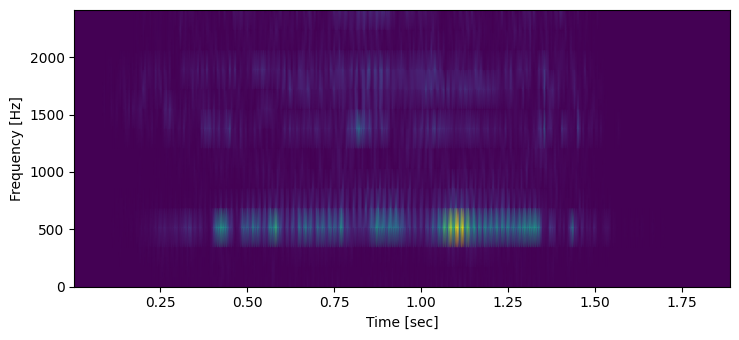

372
110568.29
0.5833333333333334


In [45]:
from scipy import signal
f, t, Sxx = signal.spectrogram(audio1, fs)
plt.pcolormesh(t, f[0:15], Sxx[0:15,:], shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()
print(len(t))

print(np.amax(Sxx[0:15,:]))
ind = np.unravel_index(np.argmax(Sxx, axis=None), Sxx.shape)
feature3 = ind[1]/len(t)
print(ind[1]/len(t))


[924.  54.  14.   3.   5.]


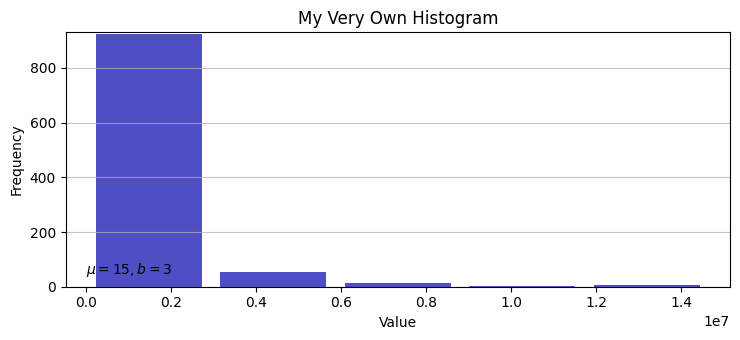

In [ ]:
hist, bin_edges = np.histogram(audio1)

n, bins, patches = plt.hist(x=np.abs(yf)[250:1250], bins=5, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('My Very Own Histogram')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
print(n)

(0.0, 120.0)

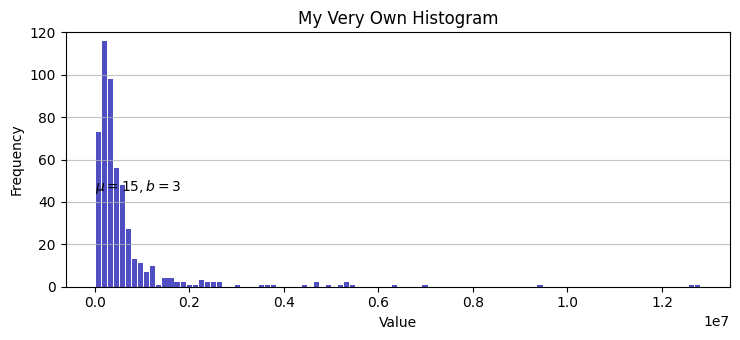

In [ ]:
hist, bin_edges = np.histogram(audio1)

n, bins, patches = plt.hist(x=np.abs(yf)[300:800], bins=100, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('My Very Own Histogram')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 90.0)

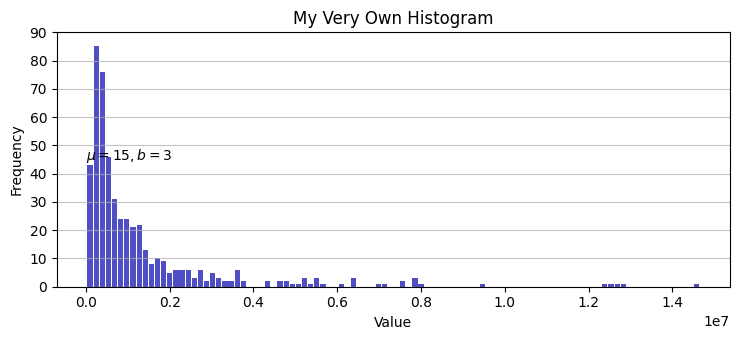

In [ ]:
hist, bin_edges = np.histogram(audio1)

n, bins, patches = plt.hist(x=np.abs(yf)[600:1100], bins=100, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('My Very Own Histogram')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)